In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

### Aggregation and Grouping

In [2]:
planets = sns.load_dataset('planets') #Seaborn Planets dataset
planets.shape

(1035, 6)

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [7]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [8]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [11]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [15]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### Pivot Tables

In [52]:
pd.DataFrame.pivot_table?

In [29]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [51]:
age = pd.cut(titanic['age'], [0, 18, 80]) #Create bins
fare = pd.qcut(titanic['fare'],2)       #quantiles
#titanic.pivot_table('survived', ['sex', age], 'class')
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (18, 80]              NaN  1.000000  0.714286          0.909091   
       NaN                   NaN  0.880000  0.444444          0.972973   
male   (18, 80]              NaN  0.000000  0.260870          0.800000   
       NaN                   0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (18, 80]  1.000000  0.318182  
       NaN       0.914286  0.391304  
male   (18, 80]  0.818182  0.178571  
       NaN       0.030303  0.192308

##### Example USA Births

In [53]:
#Download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  4  258k    4 12953    0     0  23048      0  0:00:11 --:--:--  0:00:11 27618
100  258k  100  258k    0     0   275k      0 --:--:-- --:--:-- --:--:--  306k


In [39]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [40]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'total births per year')

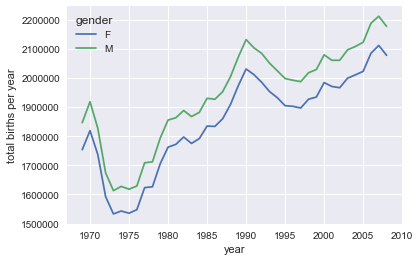

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set() #Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [41]:
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
#Extract outliers based on Gaussian distribution interquartile range
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
#Some days are null
births['day'] = births['day'].astype(int)

In [42]:
#Create a datetime index
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

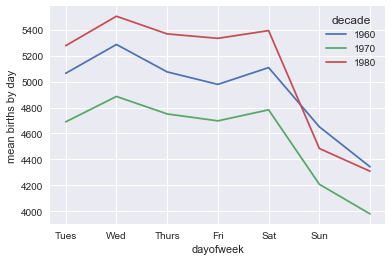

In [44]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [45]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

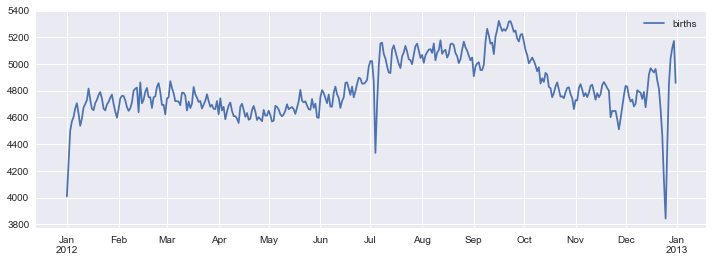

In [47]:
#The year 2012 is just a dummy
births_by_date.index = [pd.datetime(2012, month, day) 
                        for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax);

### Vectorized String Operations

In [60]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [61]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [62]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [63]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [64]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [57]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [65]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
                           'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [66]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Working with Time Series

In [67]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [68]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [74]:
import pandas as pd
date = pd.to_datetime('4th of July, 2015')
print(date)
date.strftime('%A')

2015-07-04 00:00:00


'Saturday'

In [73]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
'2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [75]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [76]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

##### Example: Visualizing Seattle Bicycle Counts 

In [1]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  207k    0  207k    0     0  53093      0 --:--:--  0:00:04 --:--:-- 53093
100  495k    0  495k    0     0   102k      0 --:--:--  0:00:04 --:--:--  102k
100  927k    0  927k    0     0   152k      0 --:--:--  0:00:06 --:--:--  201k
100 1167k    0 1167k    0     0   164k      0 --:--:--  0:00:07 --:--:--  256k
100 1412k    0 1412k    0     0   184k      0 --:--:--  0:00:07 --:--:--  300k


In [4]:
data = pd.read_csv('FremontBridge.csv', index_col = 'Date', parse_dates = True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [5]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
data.dropna().describe()

,West,East,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


Text(0,0.5,'Hourly Bicycle Count')

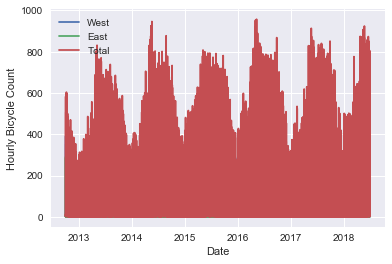

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0,0.5,'Weekly bicycle count')

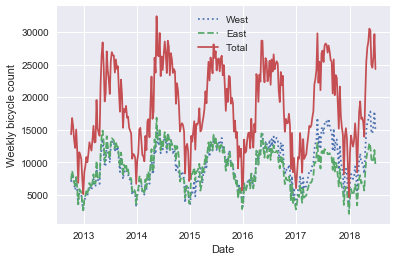

In [8]:
#resample the data by week
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')

Text(0,0.5,'mean hourly count')

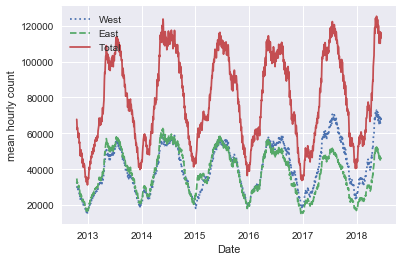

In [9]:
#organize data using rolling mean for 30-day rolling 
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

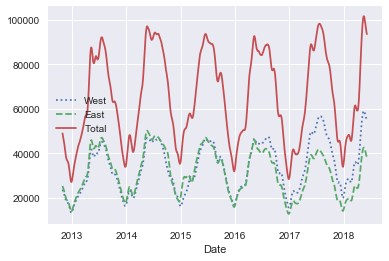

In [10]:
#Use a Gaussian window to smooth the result
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

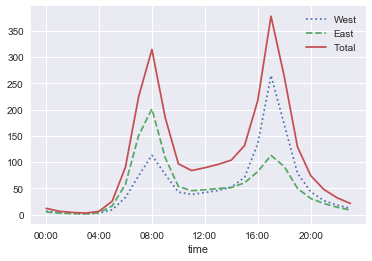

In [11]:
#Average traffic as a function of the time of day

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

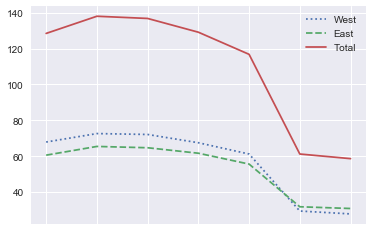

In [16]:
# How things change based on the day of the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':','--','-'])

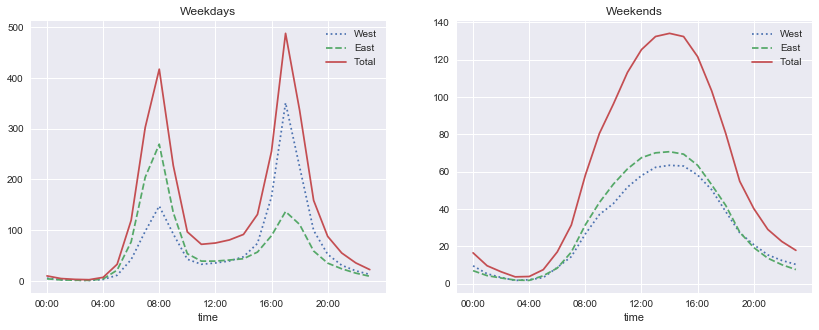

In [36]:
#Analyze week against weekend hourly traffic
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
fig, ax = plt.subplots(1,2,figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks,
                            style=[':','--','-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks,
                            style=[':','--','-'])

### High-Performance Pandas

In [40]:
#The instruction eval lets you perform memory efficient operations
# pd.eval() supports boolean operations but df.eval() doesn't, 
# use df.query instead
rng = np.random.RandomState(42)
df = pd.DataFrame(rng.rand(1000,3), columns=['A','B','C'])
df.head()

,A,B,C
0,0.374540,0.950714,0.731994
1,0.598658,0.156019,0.155995
2,0.058084,0.866176,0.601115
3,0.708073,0.020584,0.969910
4,0.832443,0.212339,0.181825


In [45]:
#The same operation
%timeit result1 = (df['A']+df['B']/(df['C'] - 1))
%timeit result2 = pd.eval('(df.A + df.B)/(df.C - 1)')
%timeit result3 = df.eval('(A + B) / (C - 1)')

282 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.64 ms ± 3.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.75 ms ± 34 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
#And can do assignment at the same time
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.374540,0.950714,0.731994,-0.787130
1,0.598658,0.156019,0.155995,2.837535
2,0.058084,0.866176,0.601115,-1.344323
3,0.708073,0.020584,0.969910,0.708816
4,0.832443,0.212339,0.181825,3.410442


In [47]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A+@column_mean') #references local variables
np.allclose(result1, result2)

True